# Step 1: Installation and Setup

In [1]:
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 33kB/s 
     |████████████████████████████████| 3.8MB 32.0MB/s 
     |████████████████████████████████| 450kB 51.7MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.1.0 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [0]:
import tensorflow as tf

In [3]:
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data preprocessing

In [0]:
# importing the dataset
from tensorflow.keras.datasets import mnist

In [6]:
# loading the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


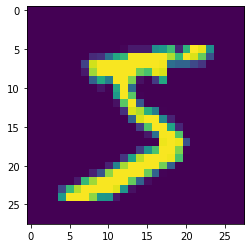

In [7]:
plt.imshow(x_train[0])

In [8]:
y_train[0]

5

In [9]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [10]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [11]:
x_train.min(), x_train.max()

(0, 255)

In [12]:
y_train.min(), y_train.max()

(0, 9)

In [0]:
# normalize the images
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [15]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [0]:
# reshape the images
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [17]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [0]:
input_shape = x_train[0].shape

In [19]:
print(input_shape)

(28, 28, 1)


# Step 3: Building the Model

In [0]:
# define an object
model = tf.keras.models.Sequential()

In [0]:
# Adding first CNN layer
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))

# Adding second CNN layer
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

# adding maxpool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

# adding dropout layer
model.add(tf.keras.layers.Dropout(0.4))

# addding flatten layer
model.add(tf.keras.layers.Flatten())

# fully connected layer (dense layer)
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

# output layer
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

# Step 4: Training the model

In [24]:
history = model.fit(x_train, y_train, batch_size=128, epochs=30, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 151s 3ms/sample - loss: 0.1734 - sparse_categorical_accuracy: 0.9474 - val_loss: 0.0545 - val_sparse_categorical_accuracy: 0.9831
Epoch 2/30
60000/60000 [==============================] - 150s 3ms/sample - loss: 0.0531 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0368 - val_sparse_categorical_accuracy: 0.9879
Epoch 3/30
60000/60000 [==============================] - 151s 3ms/sample - loss: 0.0350 - sparse_categorical_accuracy: 0.9889 - val_loss: 0.0288 - val_sparse_categorical_accuracy: 0.9906
Epoch 4/30
60000/60000 [==============================] - 150s 3ms/sample - loss: 0.0258 - sparse_categorical_accuracy: 0.9916 - val_loss: 0.0337 - val_sparse_categorical_accuracy: 0.9884
Epoch 5/30
60000/60000 [==============================] - 150s 2ms/sample - loss: 0.0227 - sparse_categorical_accuracy: 0.9922 - val_loss: 0.0317 - val_sparse_categorical_accuracy: 0.9905
Epoch 6/30

In [0]:
# model predictions
y_pred = model.predict_classes(x_test)

In [26]:
y_pred[15], y_test[15]

(5, 5)

In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 979    0    0    0    0    0    0    1    0    0]
 [   1 1131    0    0    0    0    1    1    0    1]
 [   2    4 1017    0    0    0    0    8    0    1]
 [   1    0    0 1003    0    3    0    3    0    0]
 [   0    0    0    0  977    0    0    0    0    5]
 [   1    0    0    5    0  882    4    0    0    0]
 [   6    3    0    0    1    1  946    0    1    0]
 [   0    2    3    0    0    0    0 1019    0    4]
 [  12    1    2    0    0    0    3    2  943   11]
 [   1    1    0    0    4    2    0    4    0  997]]


In [28]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9894


# Step 5: Learning curve

In [0]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['sparse_categorical_accuracy'])
  plt.plot(epoch_range, history.history['val_sparse_categorical_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

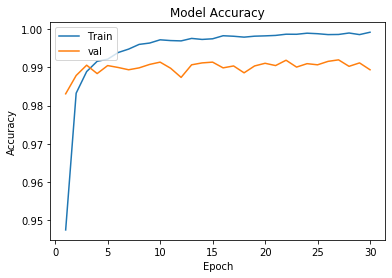

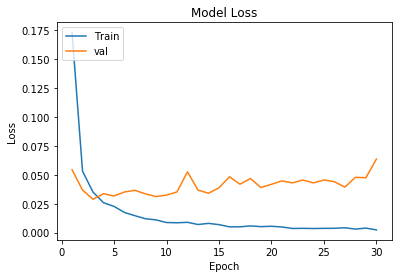

In [31]:
learning_curve(history, 30)